In [31]:
import pandas as pd

In [32]:
# definir las variables de rutas de los documentos.

path_1_15_agosto = 'datos-llamadas/Reporte_1_15_agosto.csv'
path_1_15_julio = 'datos-llamadas/Reporte_1_15_julio.csv'
path_16_31_agosto = 'datos-llamadas/Reporte_16_31_agosto.csv'
path_16_31_julio = 'datos-llamadas/Reporte_16_31_julio.csv'

# Analisis datos del 1 al 15 de julio

In [33]:
# Cargado el archivo de la fecha con pandas
df_julio_1 = pd.read_csv(path_1_15_julio, encoding='ISO-8859-1')# envio ruta de datos 1 al 15 de julio
df_julio_1.head(1)

,Fecha,Fuente,DID,Grupo,Destino,Canal origen,PIN,Canal destino,Estado,Duración,Minutos,Aplicación,ID,Unnamed: 13
0,2025-07-15 19:07:16,2131,3.184967e+09,NaN,3184966691,SIP/2131-000065da,NaN,SIP/Tk_SIP_ITBX-000065db,CONTESTADO,138s (2m 18s),3,NaN,1752624436.26611,NaN


In [34]:
#Verificamos el estado de los datos con la funcion info()
df_julio_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117925 entries, 0 to 117924
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Fecha          117925 non-null  object 
 1   Fuente         117925 non-null  object 
 2   DID            117876 non-null  float64
 3   Grupo          0 non-null       float64
 4   Destino        117925 non-null  int64  
 5   Canal origen   117925 non-null  object 
 6   PIN            0 non-null       float64
 7   Canal destino  117925 non-null  object 
 8   Estado         117925 non-null  object 
 9   Duración       117925 non-null  object 
 10  Minutos        117925 non-null  int64  
 11  Aplicación     0 non-null       float64
 12  ID             117925 non-null  object 
 13  Unnamed: 13    0 non-null       float64
dtypes: float64(5), int64(2), object(7)
memory usage: 12.6+ MB


In [35]:
# eliminar columnas que resgistran datos nulos.

df_julio_1 = df_julio_1.drop(columns=["Grupo", "PIN","Aplicación", "Unnamed: 13"])

df_julio_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117925 entries, 0 to 117924
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Fecha          117925 non-null  object 
 1   Fuente         117925 non-null  object 
 2   DID            117876 non-null  float64
 3   Destino        117925 non-null  int64  
 4   Canal origen   117925 non-null  object 
 5   Canal destino  117925 non-null  object 
 6   Estado         117925 non-null  object 
 7   Duración       117925 non-null  object 
 8   Minutos        117925 non-null  int64  
 9   ID             117925 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 9.0+ MB


In [ ]:
# Verificar datos duplicados

df_julio_1.duplicated().sum()

# si exixten duplicados utilizar la funcion drop_duplicates()

#df_julio_1 = df_julio_1.drop_duplicates()


np.int64(0)

In [38]:
# eliminar columnas que el experto dice que se pueden omitir y no aporta al problema en estudio
# Alex dice que columanas DID, Destino,Canal origen, Canal destino, Duración, ID son desechables.
# Para utilizamos la funcion drop() nuevamente.

df_julio_1 = df_julio_1.drop(columns=["DID", "Destino", "Canal origen", "Canal destino", "Duración","ID"])

df_julio_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117925 entries, 0 to 117924
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Fecha    117925 non-null  object
 1   Fuente   117925 non-null  object
 2   Estado   117925 non-null  object
 3   Minutos  117925 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 3.6+ MB


In [39]:
df_julio_1.head(5)

,Fecha,Fuente,Estado,Minutos
0,2025-07-15 19:07:16,2131,CONTESTADO,3
1,2025-07-15 19:03:09,2131,CONTESTADO,3
2,2025-07-15 19:02:47,2131,NO CONTESTADO,0
3,2025-07-15 19:02:11,2131,NO CONTESTADO,0
4,2025-07-15 19:00:19,2131,CONTESTADO,2


## Reporte minutos por estado de llamada

Es decir calcular total de llamadas contestadas y total de minutos utilizados

In [41]:
# Calcular el total de llamas en estaod contestado
# por medio de funcion count

llamadas = df_julio_1["Estado"].value_counts()
llamadas

Estado
NO CONTESTADO    59735
CONTESTADO       55377
OCUPADO           1641
FALLIDO           1172
Name: count, dtype: int64

<Axes: xlabel='Estado'>

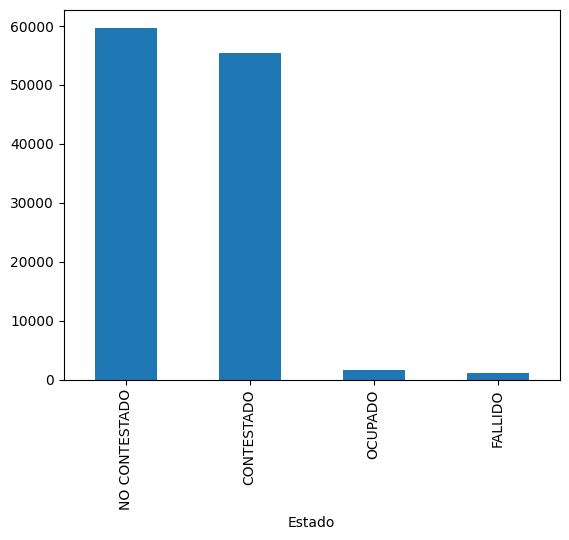

In [43]:
# graficar resporte deestado de llamadas

llamadas.plot(kind='bar')

In [51]:
# calcular total minutos en llamadas contestadas
df_contestadas = df_julio_1[df_julio_1['Estado'] == 'CONTESTADO'] # Extraer los registro que solo tiene en estado el valor de contestado
time_llamadas_contestadas = df_contestadas['Minutos'].sum()

time_llamadas_contestadas

np.int64(129780)

In [55]:
# Calcular el total de llamadas por agente
# en base a la frecuencia en la columna Fuente
llamadas_agentes  = df_julio_1["Fuente"].value_counts()

cantidad_agentes = llamadas_agentes.count()

cantidad_agentes


np.int64(176)

In [56]:
llamadas_agentes

Fuente
anonymous     37747
2604           1514
2615           1448
2531           1406
2617           1354
              ...  
3108958670        1
3118116175        1
3168031488        1
3192587838        1
3187635763        1
Name: count, Length: 176, dtype: int64

In [63]:
# Calcular los minutos por categora encontrada en llamadas_agentes y relacionarlo a el total de munitos gastados.

datos_resporte = {'agente':[],
                  'llamadas': [],
                  'minutos_totales': []
                  }
count = 0
for code, canditad_llamadas_agente in llamadas_agentes.items():
    df_minutos_agente = df_julio_1[df_julio_1['Estado'] == 'CONTESTADO'] 
    df_minutos_agente = df_minutos_agente[df_minutos_agente['Fuente'] == code]
    time_agente = df_minutos_agente['Minutos'].sum()
    datos_resporte['agente'].append(code)
    datos_resporte['llamadas'].append(canditad_llamadas_agente)
    datos_resporte['minutos_totales'].append(time_agente)   



df_reporte_agentes =  pd.DataFrame(datos_resporte)
df_reporte_agentes.to_excel("reporte_agentes_1_15_julio.xlsx", index=False)

## Ejemplo procesar und ato de texto de duracion y convertirlo en dato entero de minutos

In [30]:
import math

dato = '120s (2m 18s)'

# Pasos para procesar un dato de tiempo en texto y convertir en entro redondeado superior

partes_dato = dato.split(' ')
print(partes_dato)

valor = partes_dato[0]
limite = len(valor) - 1
valor = valor[:limite]
print(valor)

valor = int(valor)
minutos = math.ceil(valor/60)
print(minutos)


['120s', '(2m', '18s)']
120
2
